# 다양한 OCR모델 비교하기
- 일시: 2021.03.16
*****

# Step 1. 검증용 데이터셋 준비
- **단백질 파우더 영양정보(영문) 이미지 10개를 모음.**

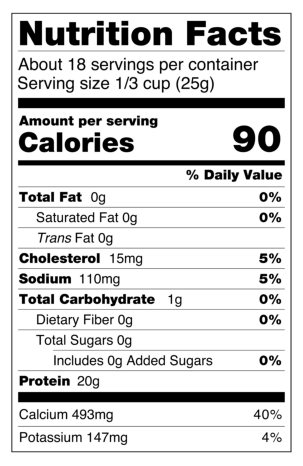

In [3]:
from matplotlib import pyplot as plt
from PIL import Image
import os
import cv2
 
# 이미지 열기
img_path = os.getenv('HOME')+'/aiffel/ocr_python/test_img/Vanilla Protein Powder.jpg'

img = cv2.imread(img_path) 

fig = plt.figure(figsize=(30,30))

ax = fig.add_subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # cv는 BGR로 나오므로 변환.
plt.axis("off") # 축 제거.
plt.show()

## OCR의 과정
- **문자의 존재를 파악(Detection)하고, 어떤 문자인지 판독(Recognition)함.**    
- **입력받은 이미지 속에서 문자 위치를 파악하는 것을 문자검출(Text Detection)이라고 하고, 찾은 문자 영역으로부터 문자를 읽어내는 것을 문자인식(Text Recognotion)이라고 함.**    
- **문자 영역을 표현하는 방법에는 Axis-aligned bounding boxes(축 정렬 사각형), oriented bounding box(회전 사각형), quadrangles(자유로운 사각형), text polygons(다각형) 등이 있음.**

# Step 2. Google OCR API, keras-ocr, Tesseract로 테스트 진행

# 구글 OCR API
## 구글 OCR API 사용법
### Step 1. 구글의 파이썬 API 인터페이스 모듈 설치
```
$ pip install --upgrade google-api-python-client
$ pip install google-cloud-vision

```

### Step 2. Google Cloud Vision API 사용
- **참고 블로그: [Google Cloud Vision API 사용하기](http://egloos.zum.com/mcchae/v/11342622)**    
- **파일은 사용하고자 하는 폴더로 옮기기(파일명: my_google_api_key)**    

### Step 3. 인증키 경로 등록 후 커널 재기동
```
$ export GOOGLE_APPLICATION_CREDENTIALS=$HOME/aiffel/ocr_python/my_google_api_key.json
```

### Step 4. API 사용 테스트
- **billing 오류 시에는 오류 메세지에 있는 주소로 들어가서 무료 평가판 시작하면 해결됨.**

In [1]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [2]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 함. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

images = ['100 percent WHEY PROTEIN POWDER, UNFLAVORED.png',
          'Clean Protein Powder – Vanilla.png',
         'Grass Fed Whey Protein Powder.png',
         'Organic Protein Superfoods Plant Based Protein Powder.png', 
         'PUMPKIN PROTEIN POWDER ORGANIC VEGAN PROTEIN POWDER.png',
         'Sports Protein Powder – Cookies and Cream.jpeg',
         'Vanilla Protein Powder.jpg',
         'Vega Sport Premium Protein.png',
         'grass fed whey protein powder.png',
         'organic hemp protein powder.png']

# 입력 이미지 경로를 지정하고 위에서 정의한 OCR API 이용 함수를 호출.
for i in images:
    path = os.getenv('HOME')+'/aiffel/ocr_python/test_img/'+i
    detect_text(path)
    print('!.......OCR Complete......!\n')

합계 109156
-rwxrwxrwx 1 aiffel-dj20 aiffel-dj20    36365  1월  8 17:39 '(E1) 1st Rock Scissor Paper Image Classification Project.ipynb'
-rw-r--r-- 1 aiffel-dj20 aiffel-dj20  3385374  2월 25 18:49 '(E10) Portrait mode.ipynb'
-rw-r--r-- 1 aiffel-dj20 aiffel-dj20   159315  2월 25 18:47 '(E11) News Summarizer.ipynb'
-rw-r--r-- 1 aiffel-dj20 aiffel-dj20 11727343  3월  1 19:08 '(E12) Image Generation.ipynb'
-rw-r--r-- 1 aiffel-dj20 aiffel-dj20  6744404  3월  4 17:44 '(E13) Stock Prediction.ipynb'
-rw-r--r-- 1 aiffel-dj20 aiffel-dj20   395245  3월  3 09:22 '(E14) Medical Imaging Project.ipynb'
-rw-r--r-- 1 aiffel-dj20 aiffel-dj20   102506  3월 11 17:29 '(E15) Chat Bot Project.ipynb'
-rw-r--r-- 1 aiffel-dj20 aiffel-dj20  2829082  3월 16 22:41 '(E16) Super Resolution.ipynb'
-rw-r--r-- 1 aiffel-dj20 aiffel-dj20   117341  3월 18 19:13 '(E17) Which movie will you watch next?.ipynb'
-rw-r--r-- 1 aiffel-dj20 aiffel-dj20    81239  3월 22 16:58 '(E18) OCR.ipynb'
-rw-r--r-- 1 aiffel-dj20 aiffel-dj20    44136  3월 

Texts:

"Nutrition Facts
40 servings per container
Servings Size 12 Tbsp (15g)
Amount Per Serving
Calories
55
% Daily Value*
2%
1%
Total Fat 1g
Saturated fat 0.2g
Trans fat 0
Polyunsaturated fat 0.5g
Monounsaturated fat 0.3g
Cholesterol Omg
Sodium Omg
Total Carbohydrate 1.5g
Dietary Fiber 1.5g
Total Sugars 0g
Includes 0g Added Sugars
Protein 10g
0%
0%
1%
5%
Vitamin D Omcg 0% Calcium 15mg 1%
Iron 3mg 15% · Potassium 225mg 5%
* The % Daily Value (DV) tells you how much a nutrient
in a serving of food contributes to a daily diet. 2,000
calories a day is used for general nutrition advice.
"

"Nutrition"

"Facts"

"40"

"servings"

"per"

"container"

"Servings"

"Size"

"12"

"Tbsp"

"(15g)"

"Amount"

"Per"

"Serving"

"Calories"

"55"

"%"

"Daily"

"Value*"

"2%"

"1%"

"Total"

"Fat"

"1g"

"Saturated"

"fat"

"0.2g"

"Trans"

"fat"

"0"

"Polyunsaturated"

"fat"

"0.5g"

"Monounsaturated"

"fat"

"0.3g"

"Cholesterol"

"Omg"

"Sodium"

"Omg"

"Total"

"Carbohydrate"

"1.5g"

"Dietary"

Texts:

"Nutrition Facts Amino Acid Profile
33 servings per container
Serving size 1.5 scoops (30g)
Amount Per Serving
Alanine
Arginine
Aspartic acid
Cysteine
0.6 g
1.3g
1.5 g
Amount per serving
120
0.3 g
Calories
Glutamic acid
2.6 g
0.8 g
Glycine
Histidine
% Daily Value
0.5g
Total Fat 3.8g
Saturated Fat 0.3g
Trans Fat Og
6%
Isoleucine"
0.6g
2%
Leucine"
0.9 g
Lysine
Methionine
Phenylalanine
0.5 g
0.4g
Omega 3 Fatty Acids 0.6g
Omega 6 Fatty Acids 2g
Cholesterol Omg
Sodium Omg
Total Carbohydrate 10g
Dietary Fiber 6g
Total Sugars 1g
Includes Og Added Sugars
37%
0%
0.6g
0.5 g
0%
Proline
0%
Serine
0.7 g
3%
Threonine
Tryptophan
Тугosine
Valine"
0.5 g
02g
0.4 g
24%
0%
Protein 139
0.7 g
*Essential Amino Acid
Vitamin D Omg
Calcium 68mg
0%
**Branched Chain Amino Acid
5%
Directions:
Iron 7mg
Potassium 396mg
Vitamin E 1mg
39%
Mix one and a half scoops of Plain Hemp in
8-12 oz of water, almond milk, or your
favorite beverage.
8%
7%
Thiamine (Vitamin B1) 0.3mg
Riboflavin (Vitamin B2) 0.2mg
Niacin (V

## 딥러닝 문자인식
![](https://aiffelstaticprd.blob.core.windows.net/media/images/E-19-5.max-800x600_fSsqPX1.png)
- **LeNet은 1998년에 발표된 CNN 계열 모델로 우편번호나 손글씨를 읽기 위해서 만들어짐.**  


- **이미지 속 문자를 찾아내는 최근 딥러닝 모델은 Object Detection(객체 인식) 방법을 사용.**
- **객체 인식은 이미지에서 관심 객체를 배경과 구분해 식별하는 자동화 기법.**    
- **딥러닝 기반 객체 검출 방법에는 Regression(회귀) 방식, Segmentation(세그멘테이션) 방식이 있음.**    
> - **Regression: 기준으로 하는 박스 대비 문자의 박스가 얼마나 차이나는 지를 학습.**    
> - **Segmentation: 픽셀 단위로 해당 픽셀이 문자를 표현하는지를 분류하는 문제(pixel-wise classification)라고 볼 수 있음.**


![](https://aiffelstaticprd.blob.core.windows.net/media/images/E-19-12.max-800x600_y9DP2Mu.png)
- **이미지 내의 문자 인식 모델의 기본적인 방법 중 하나가 바로 CNN과 RNN을 결합한 CRNN 모델.**     
 **--> 이미지 내의 텍스트와 연관된 특징을 CNN을 통해 추출한 후에 스텝 단위의 문자 정보를 RNN으로 인식하는 것.**


# keras-ocr
- **텐서플로우의 keras API를 기반으로 이미지 속 문자를 읽는 End-to-End OCR을 가능하게 해줌.**    
- **검출 모델로는 CRAFT(haracter Region Awareness for Text Detection)를 사용하고, 인식 모델로는 CRNN을 사용.**
- **keras-ocr은 텐서플로우 버전 2.2.0에서 구동됨.**
```
pip install keras-ocr
```
- **이 환경설정이 반영되어 있지 않으면 이후 코드 구동 과정에서 OOM(Out Of Memory) 에러가 날 수 있습니다. --> 밑의 코드를 터미널에 쳤을 때 true가 나와야 함.**    
```
echo $TF_FORCE_GPU_ALLOW_GROWTH
```
- **단, 한글 데이터 셋은 훈련되어있지 않아서 recognition이 엉뚱하게 나올 수 있음.**

In [3]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됨. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel-dj20/.keras-ocr/craft_mlt_25k.h5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Looking for /home/aiffel-dj20/.keras-ocr/crnn_kurapan.h5


In [4]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 

images = ['100 percent WHEY PROTEIN POWDER, UNFLAVORED.png',
          'Clean Protein Powder – Vanilla.png',
         'Grass Fed Whey Protein Powder.png',
         'Organic Protein Superfoods Plant Based Protein Powder.png', 
         'PUMPKIN PROTEIN POWDER ORGANIC VEGAN PROTEIN POWDER.png',
         'Sports Protein Powder – Cookies and Cream.jpeg',
         'Vanilla Protein Powder.jpg',
         'Vega Sport Premium Protein.png',
         'grass fed whey protein powder.png',
         'organic hemp protein powder.png']

for i in images:
    path = os.getenv('HOME')+'/aiffel/ocr_python/test_img/'+i
    keras_images = [ keras_ocr.tools.read(path) for i in images]
    prediction_groups = [pipeline.recognize([path]) for i in images]
    print('!.......OCR Complete......!\n')

!.......OCR Complete......!

!.......OCR Complete......!

!.......OCR Complete......!

!.......OCR Complete......!

!.......OCR Complete......!

!.......OCR Complete......!

!.......OCR Complete......!

!.......OCR Complete......!

!.......OCR Complete......!

!.......OCR Complete......!



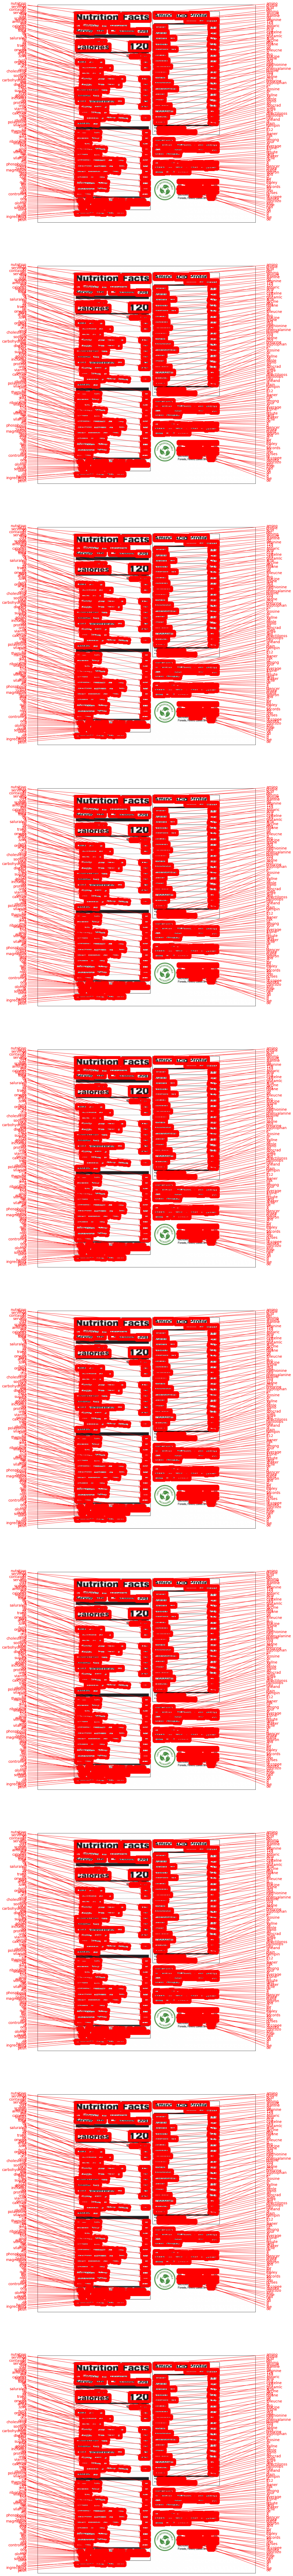

In [9]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(180, 180))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=keras_images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

# 태서랙트

- **구글에서 후원하는 OCR 오픈소스 라이브러리.**    
- **버전 4에서는 LSTM이 엔진에 추가되었고 현재 한국어를 포함한 116 개 국어를 지원하고 있음.**    

### Step 1. 태서렉트 설치
```
$ sudo apt install tesseract-ocr
$ sudo apt install libtesseract-dev
```

### Step 2. 테서랙트 파이썬 wrapper 설치하기
- **Pytesseract는 OS에 설치된 테서랙트를 파이썬에서 쉽게 사용할 수있도록 해주는 래퍼 라이브러리(wrapper library)로 파이썬 내에서 컴퓨터에 설치된 테서렉트 엔진의 기능을 바로 쓸 수 있도록 해줌.**
```
pip install pytesseract
```

### Step 3. 테서렉트로 문자 검출하고 이미지 자르기(Detection)
- **한국어는 따로 언어팩을 설치해주어야 함.**
```
$ sudo apt install tesseract-ocr-kor
```

In [11]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

# 테스트 이미지를 받아서 문자 검출을 시행한 후,
# 검출된 문자 영역을 crop한 이미지로 만들어 그 파일들의 list를 반환하는 함수.
def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)
    
    # pytesseract의 출력을 사용해서 결과값의 형식을 딕셔너리로 설정.
    # 인식된 Bbox는 left, top, width, height 정보를 가지게 됨. 
    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

for i in images:
    work_dir = os.getenv('HOME')+'/aiffel/ocr_python/test_img/'
    img_file_path = work_dir + i
    cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
    print('!.......OCR Complete......!\n')

/home/aiffel-dj20/aiffel/ocr_python/test_img/0000.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0001.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0002.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0003.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0004.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0005.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0006.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0007.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0008.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0009.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0010.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0011.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0012.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0013.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0014.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0015.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0016.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0017.png
/home/aiffel-dj20/aiffel/ocr

/home/aiffel-dj20/aiffel/ocr_python/test_img/0000.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0001.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0002.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0003.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0004.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0005.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0006.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0007.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0008.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0009.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0010.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0011.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0012.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0013.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0014.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0015.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0016.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0017.png
/home/aiffel-dj20/aiffel/ocr

/home/aiffel-dj20/aiffel/ocr_python/test_img/0000.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0001.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0002.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0003.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0004.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0005.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0006.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0007.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0008.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0009.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0010.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0011.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0012.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0013.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0014.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0015.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0016.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0017.png
/home/aiffel-dj20/aiffel/ocr

/home/aiffel-dj20/aiffel/ocr_python/test_img/0000.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0001.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0002.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0003.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0004.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0005.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0006.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0007.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0008.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0009.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0010.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0011.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0012.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0013.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0014.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0015.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0016.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0017.png
/home/aiffel-dj20/aiffel/ocr

/home/aiffel-dj20/aiffel/ocr_python/test_img/0000.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0001.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0002.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0003.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0004.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0005.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0006.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0007.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0008.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0009.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0010.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0011.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0012.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0013.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0014.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0015.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0016.png
/home/aiffel-dj20/aiffel/ocr_python/test_img/0017.png
/home/aiffel-dj20/aiffel/ocr

In [12]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

dl


Nutrition

Facts

3:4

Servis

Jer

cConiainer

Serving

size

71.&

SsCOOps

(30g)

FEPipigae pope aga wigan gee aed ee ee ad ed

Calories

120

_

b

a

Saturated

mel

39

2

UJrmeqa

4

Patty

AOKs

U4

37%

mega

5.

Patty

aAckiss

2q



Cholesterol

ult



Soo hurry

vmg

Ue

Total

Carbohydrate

UG

a

Jielary

Pear

oy

2

Toll

Sugars

1g


i

y Added

Sugars

“is

SS ee ee eee ee

Vilarmin WU Ong

Ls.

mom

DeuTIC

ON

V itarnun

b

img

a

| hearrene

yYeamin

5)

J.T

oe es

Spot lavin

PVitarmun

oe)

emg

1 es


NAIM

PViimain

3)

|

any

Lp

Pnospnor

us G/M

1

Viarie@siurns

eoarmng

Py 9s

é ie

ang

—_—__—_—-

aa


Amin

o Acid

rProtile

Arnone

oe

f Serving

Lanine

U.6qg

Arginine

13g

log

v.30

cog

v.5q

VOg

vV.5q

9g

Vg

V4g

U.6g

V.Og

v.f Q

U5g

v.2g

VAG

v./ g

ee


eee...

=

NNN NINN NN INNINGS SUSU a


On

ingred

*****

# Step 3. 테스트 결과 정리

**코드 밑에 도출된 결과를 봐주시면 감사드리겠다.**

*****

# Step 4. 결과 분석과 결론 제시

## 서비스의 목적과 내용

>- **목적: 단백질 및 당류 함량 조사**    
- **내용: 몸을 만들려고 운동을 하는 사람들에게 단백질은 매우 중요하다. 그래서 사람들은 단백질을 보충하기 위한 식품을 찾아서 먹는다. 사람들은 단백질 보충을 위해 달걀이나 닭가슴살 등을 찾기도 허지만 아마 가장 많이 먹는 것은 단백질 파우더 일 것이다. 물에 타서 마시면 이보다 간단하게 단백질을 보충할 수 있는 방법은 없을 것이기 때문이다.**    

 **하지만 모든 단백질 파우더가 좋은 것은 아니다. 단백질 파우더인데 생각보다 단백질이 많이 들어가있지 않은 것도 있고, 단백질 섭취를 위해 먹는 것인데 당류가 생각보다 높아 살이 찔 가능성이 높은 파우더들도 상당히 많다.**    
 
 **하지만 영양성분표에서 단백질과 당류를 일일이 찾아보는 것은 굉장히 품이 많이드는 일이다. 그리고 따로따로 살펴봐야하기 때문에 한번에 다양한 제품을 비교하기도 어렵다.**    
 
 **그래서 나는 OCR 인식 기술을 사용하여 단백질과 당류 및 설탕의 비율을 확인하여 단백질이 가장 많이 들어있음과 동시에 당류는 가장 적은 단백질 파우더를 손쉽게 찾을 수 있는 서비스를 기획해보았다.**
 


## 평가기준

>**1. 단백질 함량을 잘 찾아내었는가?**    
>**2. 당류 함량을 잘 찾아내었는가?**


## 결론 제시
**나는 총 3가지의 모듈을 사용하여 단백질 파우더의 영양성분표를 분석해보았다. 가장 보기 좋은 것은 구글 OCR API인 것 같다. 구글 OCR API는 영양성분표를 전체적으로 텍스트화 해주고, 그 밑에 단어들이 하나씩 따로 보여준다. 도출된 결과에서 Ctrl+F를 하여 protein을 찾으면 원하는 결과를 금방 찾아 낼 수 있었다. 그래서 가장 좋은 모듈이라고 생각한다.**    

**두번째는 keras 모듈이다. 사진이 크고 내용이 많아 표시된 단어가 복잡하여 가장 좋은 모듈로는 선정하지 않았다. 하지만 영어로 된 영양성분 속 텍스트는 정말 잘 찾아 냈다.**    

**테서렉트는 영어와 한국어 모두 이미지에서 문자를 검출하는 것에 최악의 성능을 보였다. 이상한 문자를 인식하고, 심지어는 문자가 아닌 부분을 인식했다. 이는 인식된 문자를 크롭하여 이미지로 저장해 둔 것을 보면 명확히 알 수 있는 사실이었다. 그래서 테서렉트는 OCR에서 추천하지 않는다.**

*****

# 루브릭 평가

|**평가문항**|**상세기준**|
|:----|:----|
|**1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?**|**목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.**|
|**2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?**|**평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.**|
|**3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?**|**최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.**|

**1. 기획은 타당하다고 본다. 나도 운동을 했던 사람이었기 때문에 단백질 파우더를 고를 때 단백질 함량과 당류를 주의깊게 봤기 때문이다. 특히 다이어트를 목적으로 단백질 파우더를 섭취하는 사람에게 당류 함량을 정말 큰 문제이다.**    

**2. 특정 단어를 잘 인식하는지 아닌지가 이번 기획에 핵신이었다. 데이터의 특징은 다양한 무기질과 유기질들의 이름이 혼합된 영양성분표라고 하면 될지 모르겠다.**    

**3. 나는 10장의 이미지를 사용하였다. 의외로 단백질 파우더 영양성분표를 구하는 것이 어려웠다. 왜냐하면 jpg 파일이 아니라 확장자명이 web에서만 볼 수 있는 것이 많았기 때문이다. 그래서 10장만 했다. 시각화는 하고 싶었지만 너무 어렵기도 했도 출력값을 살펴보는 것만으로도 충분한 것 같아 건너뛰었다.**

# 회고

**OCR 기술은 은행에서 계좌를 만들 때 은행 어플에서 써본 적 있었다. 그리고 논문 검수자로 일할 때 마우스로 긁히지 않는 일부 논문들을 OCR 변환하여 복사할 수 있게 만든 적이 있었다. 그때 가끔 글자들이 이상하게 변환되는 경우가 있었는데 그때는 기술을 뭘 이렇게 만들어놨나 생각했었다. 하지만 이제는 이 기술이 얼마나 어려운 것인지 알게 되었다. 그때 알집 OCR을 사용했는데 아마 테서렉트 기반으로 만든 것이 아닐까하는 추측을 해본다.**    

**CV 중에서도 정말 흥미로운 프로젝트였다. 굉장히 실용적이다. 생각해보니 파파고 번역기로 힌디어를 찍으면 한국어로 변환되는 것도 본 적이 있구나...! 멋진 기술이다.**